# Explore here

In [6]:
# Your code here
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df = pd.read_csv(url)

print(df.head())

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


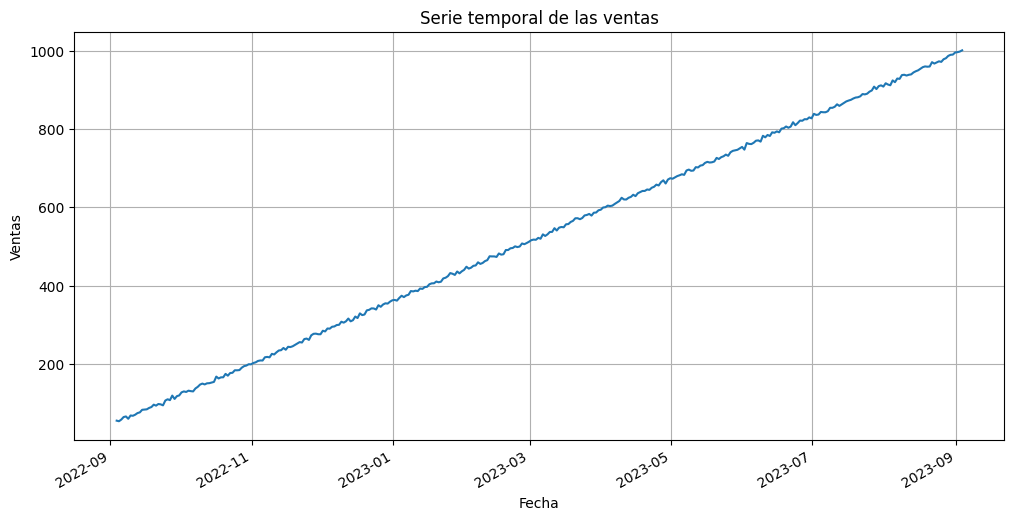

In [7]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['sales'].plot(figsize=(12,6), title='Serie temporal de las ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

TENSOR SERIE TEMPORAL

In [8]:
#La frecuencia temporal de mis datos es de 1 día, es decir todos los días me dan datos 
print(df.index.to_series().diff().value_counts())

date
1 days    365
Name: count, dtype: int64


TENDENCIA

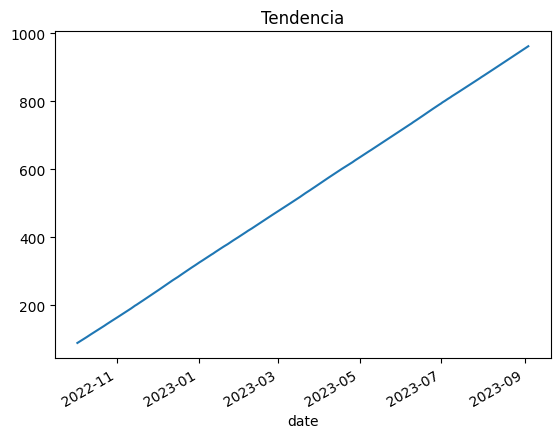

In [9]:
#Claramente se puede ver una tendencia al alza, aunque ya solo viendo la primera gráfica se podía ver
df['sales'].rolling(window=30).mean().plot(title="Tendencia")
plt.show()

Estacionalidad

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

seasonal = result.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()


NameError: name 'result' is not defined

In [ ]:
from statsmodels.tsa.stattools import adfuller
#Hacemos un test en el que la hipotesis nula es estacionaria y en la alternativa no lo es, en este caso, no lo es.
resultado = adfuller(df['sales'])
print(f'ADF: {resultado[0]}')
print(f'Valor de p {resultado[1]}')

#Como p es mayor a 0,05 no es estacionaria

ADF: 0.545414193706378
Valor de p 0.9861899815311064


Ruido o variabilidad

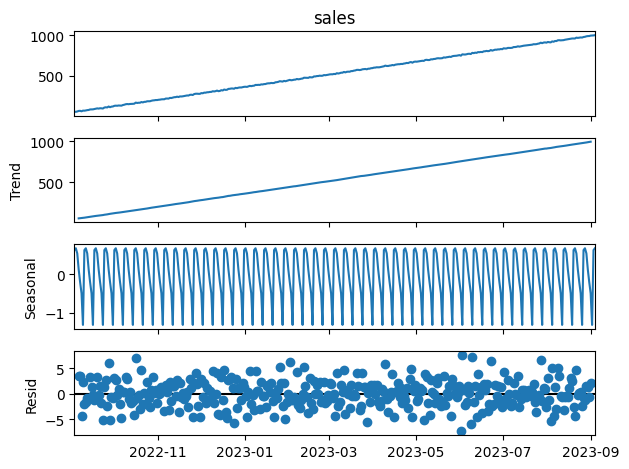

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['sales'])
result.plot()
plt.show()

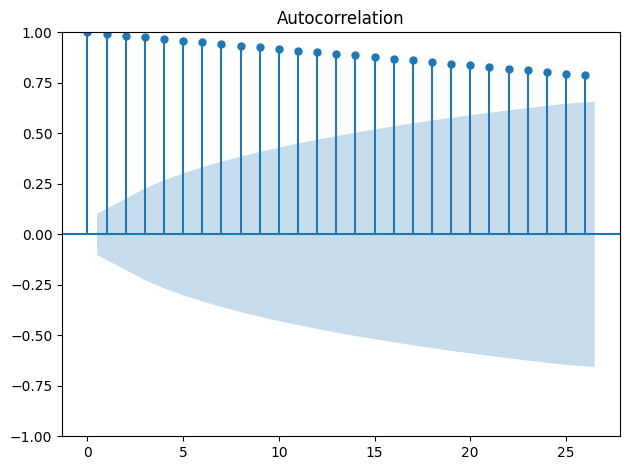

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df)

plt.tight_layout()

plt.show()



ARIMA

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
import os 

# He tenido que usar esto para que funcione... lo he tenido que buscar en stackoverflow
!pip install numpy==1.26.4 --quiet

# Reiniciamos la sesion de google colab 
os.kill(os.getpid(), 9)

: 

In [ ]:
!pip install pmdarima --quiet 

In [ ]:
import numpy as np 
print(" ===> Version de NUMPY : ", np.__version__)

# Cargamos el modulo pmdarima y mostramos la version instalada
import pmdarima as pm
print(" ===> Version de PMDARIMA : ", pm.__version__)

 ===> Version de NUMPY :  1.26.4
 ===> Version de PMDARIMA :  2.0.4


In [ ]:
#Entrenar
model = auto_arima(df, seasonal = False, trace = True, m = 7)


/home/vscode/.local/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.04 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.40 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [16]:
#Predecir
entrenamiento = model.predict(60)
entrenamiento


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2023-09-04 17:10:08.079328    1002.158148
2023-09-05 17:10:08.079328    1004.831668
2023-09-06 17:10:08.079328    1007.423289
2023-09-07 17:10:08.079328    1010.021630
2023-09-08 17:10:08.079328    1012.619419
2023-09-09 17:10:08.079328    1015.217253
2023-09-10 17:10:08.079328    1017.815084
2023-09-11 17:10:08.079328    1020.412915
2023-09-12 17:10:08.079328    1023.010746
2023-09-13 17:10:08.079328    1025.608577
2023-09-14 17:10:08.079328    1028.206408
2023-09-15 17:10:08.079328    1030.804239
2023-09-16 17:10:08.079328    1033.402071
2023-09-17 17:10:08.079328    1035.999902
2023-09-18 17:10:08.079328    1038.597733
2023-09-19 17:10:08.079328    1041.195564
2023-09-20 17:10:08.079328    1043.793395
2023-09-21 17:10:08.079328    1046.391226
2023-09-22 17:10:08.079328    1048.989057
2023-09-23 17:10:08.079328    1051.586888
2023-09-24 17:10:08.079328    1054.184719
2023-09-25 17:10:08.079328    1056.782550
2023-09-26 17:10:08.079328    1059.380381
2023-09-27 17:10:08.079328    1061

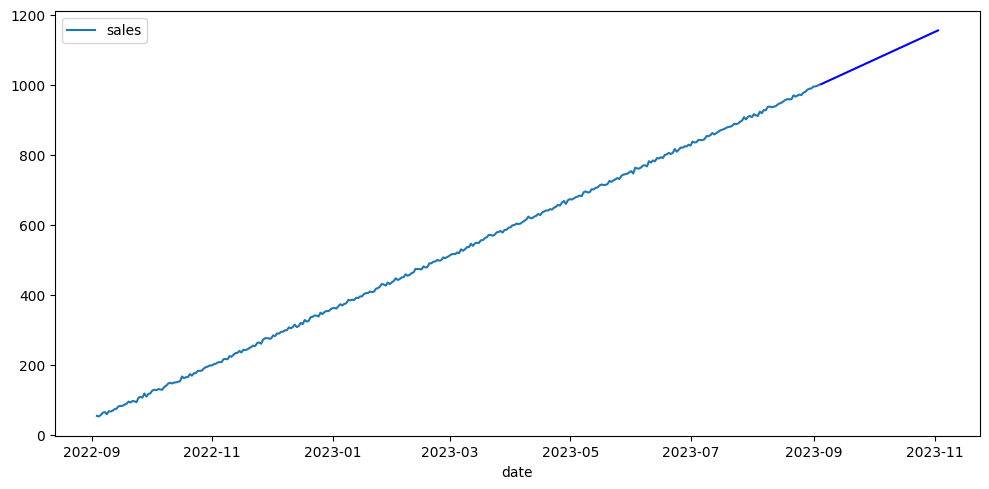

In [15]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = entrenamiento, c = "blue")

plt.tight_layout()

plt.show()
